# Code for 'Co-opting “Danger” in Group Media for Law Enforcement'

Goals:
* Show currated dataset
* Show some simple visualizations
* Topic modeling for all articles
* Topic modeling for certain categories
* Visualize topic models over time

## Data

This is the data I compiled through webscraping [Police1](police1.com). Luckily, Police1 retains all of their old articles in an easy to query archive. To find older stories a page number just needs to be added to the url (ex. https://www.police1.com/law-enforcement-news/page-160/, would get the 160th page). I manually found a starting and ending point that aligned with January 2020 and December 2021. Then I iterated through each page and pull out every link. Then I iterated through each link to get the text in each article. At each step, some data cleaning techniques were employed to facilitate later cleaning and analysis.  

In [1]:
import pandas as pd
police1 = pd.read_csv('police_news/all_articles_2020_2022_11_15.csv').dropna().reset_index().drop(['Unnamed: 0','index'],axis=1)
police1.Date = police1.Date.apply(pd.to_datetime)
police1

Title  \
0     Missouri police: Cop fatally shot man who hit ...   
1     Illinois governor clears thousands of marijuan...   
2     NYC ends 2019 with a jump in shootings and hom...   
3     K-9 dies after collision that injured Kentucky...   
4                      3 times I was glad I had a knife   
...                                                 ...   
7851  Judge sides with law enforcement in pipeline p...   
7852  LAPD officer who fatally shot 14-year-old desc...   
7853  Colorado wildfires burn hundreds of homes, for...   
7854  California criminal justice panel eyes 'three ...   
7855  More than 20% of NYPD out sick due to COVID-19...   

                                               Subtitle  \
0     The man drove a stolen vehicle into the office...   
1     State officials estimate that 116,000 convicti...   
2     The increase in homicides come amid fears a se...   
3     Capt. Casey McCoy was making a left turn onto ...   
4     A veteran officer recounts several encounters ...   
...                                                 ...   
7851  Demonstrators had alleged that police used exc...   
7852  “He’s truly devastated at the results of the o...   
7853  “This is the kind of fire we can’t fight head ...   
7854  They want an "across-the-board reduction in in...   
7855  The NYPD received 7,270 sick calls — the most ...   

                                                   Link                Date  \
0     https://www.police1.com/officer-shootings/arti... 2019-12-31 18:08:37   
1     https://www.police1.com/legal/articles/illinoi... 2019-12-31 18:23:02   
2     https://www.police1.com/patrol-issues/articles... 2019-12-31 18:31:12   
3     https://www.police1.com/k-9/articles/k-9-dies-... 2019-12-31 23:09:27   
4     https://www.police1.com/police-products/duty-g... 2020-01-01 10:00:00   
...                                                 ...                 ...   
7851  https://www.police1.com/officer-safety/article... 2021-12-30 17:44:54   
7852  https://www.police1.com/officer-shootings/arti... 2021-12-30 22:41:03   
7853  https://www.police1.com/disaster-response/arti... 2021-12-30 22:58:07   
7854  https://www.police1.com/arrests-sentencing/art... 2021-12-31 11:41:57   
7855  https://www.police1.com/coronavirus-covid-19/a... 2021-12-31 12:00:00   

                  Category                                               text  \
0        officer-shootings  CHESTERFIELD, Mo. — Police in suburban St. Lou...   
1                    legal  CHICAGO — Illinois' governor granted more than...   
2            patrol-issues  NEW YORK CITY — As the city bids farewell to 2...   
3                      k-9  LEXINGTON, Ky. — The Boyle County Sheriff's De...   
4          police-products  Sponsored by ZT Knives By Sean Curtis for Poli...   
...                    ...                                                ...   
7851        officer-safety  BISMARCK, N.D. — A federal judge has sided wit...   
7852     officer-shootings  LOS ANGELES — Los Angeles police Officer Willi...   
7853     disaster-response  DENVER — An estimated 580 homes, a hotel and a...   
7854    arrests-sentencing  LOS ANGELES — For more than a year, a seven-pe...   
7855  coronavirus-covid-19  STATEN ISLAND, N.Y. — More than 20% of the New...   

                                                 author  
0                                      Associated Press  
1                 By Kathleen Foody\r\nAssociated Press  
2     By Wes Parnell and Thomas Tracy\r\nNew York Da...  
3              By Karla Ward\r\nLexington Herald-Leader  
4                                           Sean Curtis  
...                                                 ...  
7851                                   Associated Press  
7852         By Tony Saavedra\r\nLos Angeles Daily News  
7853  By Patty Nieberg\r\nAssociated Press/Report fo...  
7854               By Hannah Wiley\r\nLos Angeles Times  
7855      By Kayla Simas\r\nStaten Island Advance, N.Y.  

[7856 rows x 

## Simple visualizations

Here I wanted to show some frequency plots of certain columns.

<AxesSubplot: ylabel='Category'>

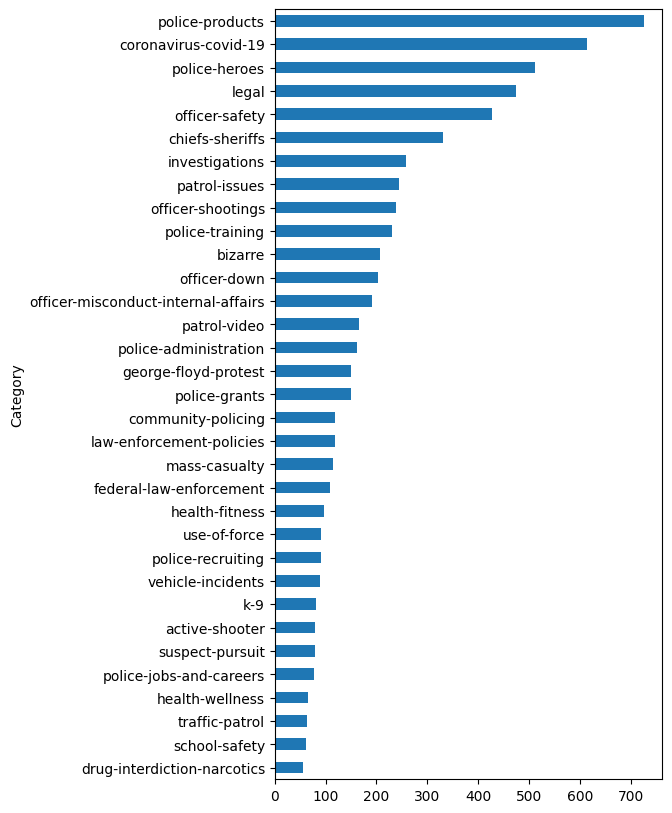

In [2]:
cat_size = police1.groupby('Category').size().sort_values()
cat_size.loc[cat_size > 50].plot(kind='barh',figsize=(5,10))  # categories with more than 20 articles

<AxesSubplot: ylabel='Date'>

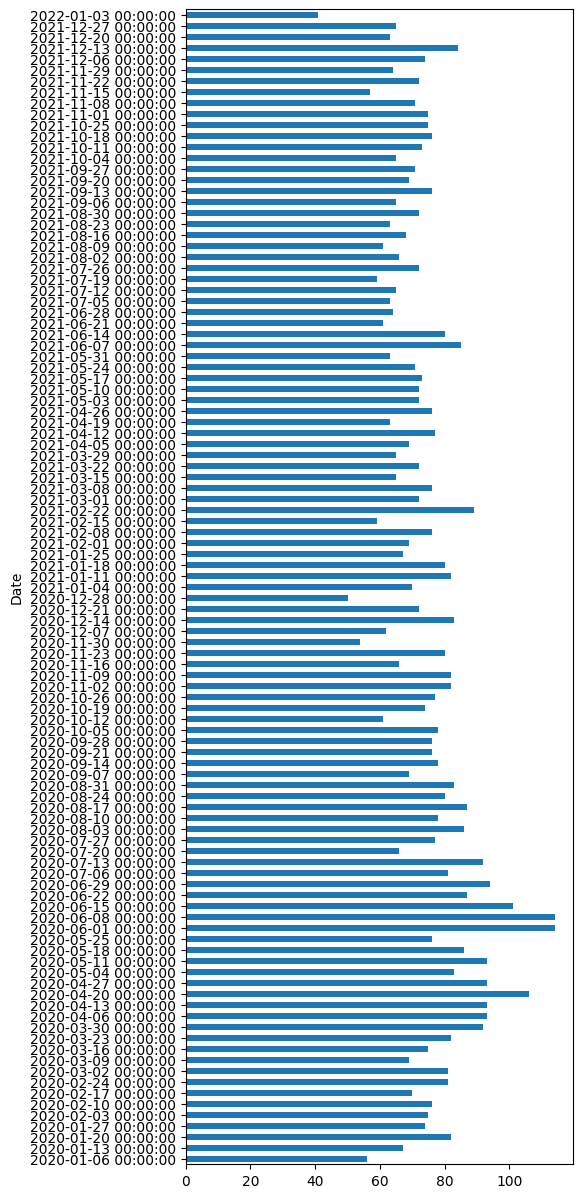

In [3]:
police1.groupby(pd.Grouper(key='Date', freq='W-MON')).size().plot(kind='barh', figsize=(5,15)) # distribution of articles per week

## Topic models

Topic models are technqiues designed to give the user a sense of what is in a certain corpus. They were designed very early on in the history of NLP and continue to be an area of research. Unfortunately, not many attempts are made to use the topic model as a method of reading, that is as a way to bridge the gap between distant and close reading methods. In this project, I wanted to design topic models that could not only be interpretations but also be interpretable. They are both the result of some analysis and a starting point for more anaylsis.

### Cleaning

We begin by cleaning our data. As opposed to the cleaning I mentioned above, this is a much deeper kind of cleaning. Above, I wated to make sure that all of the text I pulled from the website was the text that we were interested in, the text of the articles themselves. This cleaning step takes in that text which we are sure is the text in each article and removes words that would confuse the vectorization of the text. In this case, I chose to strip out all of the stop words, all of the numbers and all of the punctuation. Then I lemmatized everything and put it in lower case. This type of cleaning ensures that when out vectorizer encounters a word, it won't have to worry about the most complicated parts of language like inflection and declension and instead can focus on the meaning that the words produce. This is always a balancing act. We want there to be enough nuance that the model can learn something about the meaning of the words, but we also don't want it to get hung up on words which have the same meaning but different forms. I chose a simple though deep cleaning method here using an popular NLP package called `spaCy`. It would be interesting to experiment with more techniques and compare results.

In [ ]:
import spacy
from tqdm import tqdm
tqdm.pandas()
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipes('ner')

def process_text(text):
    doc = nlp(text)
    tokens = [token for token in doc]
    no_stops = [token for token in tokens if not token.is_stop]
    no_punct = [token for token in no_stops if token.is_alpha]
    lemmas = [token.lemma_ for token in no_punct]
    lemmas_lower = [lemma.lower() for lemma in lemmas]
    lemmas_string = ' '.join(lemmas_lower)
    return lemmas_string

police1['clean_text'] = police1['text'].progress_apply(process_text)

In [ ]:
police1.to_csv('police1_cleaned.csv')

In [5]:
police1 = pd.read_csv('police1_cleaned.csv')

In [6]:
police1

Unnamed: 0  Unnamed: 0.1  \
0              0             0   
1              1             1   
2              2             2   
3              3             3   
4              4             4   
...          ...           ...   
7817        7817          7851   
7818        7818          7852   
7819        7819          7853   
7820        7820          7854   
7821        7821          7855   

                                                  Title  \
0     Missouri police: Cop fatally shot man who hit ...   
1     Illinois governor clears thousands of marijuan...   
2     NYC ends 2019 with a jump in shootings and hom...   
3     K-9 dies after collision that injured Kentucky...   
4                      3 times I was glad I had a knife   
...                                                 ...   
7817  Judge sides with law enforcement in pipeline p...   
7818  LAPD officer who fatally shot 14-year-old desc...   
7819  Colorado wildfires burn hundreds of homes, for...   
7820  California criminal justice panel eyes 'three ...   
7821  More than 20% of NYPD out sick due to COVID-19...   

                                               Subtitle  \
0     The man drove a stolen vehicle into the office...   
1     State officials estimate that 116,000 convicti...   
2     The increase in homicides come amid fears a se...   
3     Capt. Casey McCoy was making a left turn onto ...   
4     A veteran officer recounts several encounters ...   
...                                                 ...   
7817  Demonstrators had alleged that police used exc...   
7818  “He’s truly devastated at the results of the o...   
7819  “This is the kind of fire we can’t fight head ...   
7820  They want an "across-the-board reduction in in...   
7821  The NYPD received 7,270 sick calls — the most ...   

                                                   Link                 Date  \
0     https://www.police1.com/officer-shootings/arti...  2019-12-31 18:08:37   
1     https://www.police1.com/legal/articles/illinoi...  2019-12-31 18:23:02   
2     https://www.police1.com/patrol-issues/articles...  2019-12-31 18:31:12   
3     https://www.police1.com/k-9/articles/k-9-dies-...  2019-12-31 23:09:27   
4     https://www.police1.com/police-products/duty-g...  2020-01-01 10:00:00   
...                                                 ...                  ...   
7817  https://www.police1.com/officer-safety/article...  2021-12-30 17:44:54   
7818  https://www.police1.com/officer-shootings/arti...  2021-12-30 22:41:03   
7819  https://www.police1.com/disaster-response/arti...  2021-12-30 22:58:07   
7820  https://www.police1.com/arrests-sentencing/art...  2021-12-31 11:41:57   
7821  https://www.police1.com/coronavirus-covid-19/a...  2021-12-31 12:00:00   

                  Category                                               text  \
0        officer-shootings  CHESTERFIELD, Mo. — Police in suburban St. Lou...   
1                    legal  CHICAGO — Illinois' governor granted more than...   
2            patrol-issues  NEW YORK CITY — As the city bids farewell to 2...   
3                      k-9  LEXINGTON, Ky. — The Boyle County Sheriff's De...   
4          police-products  Sponsored by ZT Knives By Sean Curtis for Poli...   
...                    ...                                                ...   
7817        officer-safety  BISMARCK, N.D. — A federal judge has sided wit...   
7818     officer-shootings  LOS ANGELES — Los Angeles police Officer Willi...   
7819     disaster-response  DENVER — An estimated 580 homes, a hotel and a...   
7820    arrests-sentencing  LOS ANGELES — For more than a year, a seven-pe...   
7821  coronavirus-covid-19  STATEN ISLAND, N.Y. — More than 20% of the New...   

                                                 author  \
0                                      Associated Press   
1                 By Kathleen Foody\r\nAssociated Press   
2     By Wes Parnell and Thomas Tracy\r\nNew York Da...   
3        

In [2]:
import pandas as pd
police1 = pd.read_csv('police1_cleaned.csv')
police1 = police1.drop(police1.loc[police1['clean_text'].isnull()].index).reset_index(drop=True).drop('Unnamed: 0',axis=1) # removing any empty articles
police1

Unnamed: 0.1                                              Title  \
0                0  Missouri police: Cop fatally shot man who hit ...   
1                1  Illinois governor clears thousands of marijuan...   
2                2  NYC ends 2019 with a jump in shootings and hom...   
3                3  K-9 dies after collision that injured Kentucky...   
4                4                   3 times I was glad I had a knife   
...            ...                                                ...   
7817          7851  Judge sides with law enforcement in pipeline p...   
7818          7852  LAPD officer who fatally shot 14-year-old desc...   
7819          7853  Colorado wildfires burn hundreds of homes, for...   
7820          7854  California criminal justice panel eyes 'three ...   
7821          7855  More than 20% of NYPD out sick due to COVID-19...   

                                               Subtitle  \
0     The man drove a stolen vehicle into the office...   
1     State officials estimate that 116,000 convicti...   
2     The increase in homicides come amid fears a se...   
3     Capt. Casey McCoy was making a left turn onto ...   
4     A veteran officer recounts several encounters ...   
...                                                 ...   
7817  Demonstrators had alleged that police used exc...   
7818  “He’s truly devastated at the results of the o...   
7819  “This is the kind of fire we can’t fight head ...   
7820  They want an "across-the-board reduction in in...   
7821  The NYPD received 7,270 sick calls — the most ...   

                                                   Link                 Date  \
0     https://www.police1.com/officer-shootings/arti...  2019-12-31 18:08:37   
1     https://www.police1.com/legal/articles/illinoi...  2019-12-31 18:23:02   
2     https://www.police1.com/patrol-issues/articles...  2019-12-31 18:31:12   
3     https://www.police1.com/k-9/articles/k-9-dies-...  2019-12-31 23:09:27   
4     https://www.police1.com/police-products/duty-g...  2020-01-01 10:00:00   
...                                                 ...                  ...   
7817  https://www.police1.com/officer-safety/article...  2021-12-30 17:44:54   
7818  https://www.police1.com/officer-shootings/arti...  2021-12-30 22:41:03   
7819  https://www.police1.com/disaster-response/arti...  2021-12-30 22:58:07   
7820  https://www.police1.com/arrests-sentencing/art...  2021-12-31 11:41:57   
7821  https://www.police1.com/coronavirus-covid-19/a...  2021-12-31 12:00:00   

                  Category                                               text  \
0        officer-shootings  CHESTERFIELD, Mo. — Police in suburban St. Lou...   
1                    legal  CHICAGO — Illinois' governor granted more than...   
2            patrol-issues  NEW YORK CITY — As the city bids farewell to 2...   
3                      k-9  LEXINGTON, Ky. — The Boyle County Sheriff's De...   
4          police-products  Sponsored by ZT Knives By Sean Curtis for Poli...   
...                    ...                                                ...   
7817        officer-safety  BISMARCK, N.D. — A federal judge has sided wit...   
7818     officer-shootings  LOS ANGELES — Los Angeles police Officer Willi...   
7819     disaster-response  DENVER — An estimated 580 homes, a hotel and a...   
7820    arrests-sentencing  LOS ANGELES — For more than a year, a seven-pe...   
7821  coronavirus-covid-19  STATEN ISLAND, N.Y. — More than 20% of the New...   

                                                 author  \
0                                      Associated Press   
1                 By Kathleen Foody\r\nAssociated Press   
2     By Wes Parnell and Thomas Tracy\r\nNew York Da...   
3              By Karla Ward\r\nLexington Herald-Leader   
4                                           Sean Curtis   
...                                                 ...   
7817                                   Associated Press   
7818         B

I mentioned something called 'stop words' above. These are commonly occuring words that we should get rid of so that we can have better results. The definition of a stop word changes depending on who you ask and what you're trying to do. Above we used `spaCy`'s builting stop words and below we're taking out any further stop words that are in `NLTK`'s (another popular NLP package) stop words as well as any other words we wnat to omit (in this case, 'say' because I saw it occurring in several topics). A lot of this is trial and error and this is was a set up that I found worked well, but again, this is a place where we can experiment and compare results.

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def strip_stops(text):
    my_stops = stopwords.words('english')
    my_stops.append('say')
    my_stops = set(my_stops)
    text_set = set(text.split(' '))
    return ' '.join(list(text_set - my_stops))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pnadel01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
police1_no_stops = police1
police1_no_stops['clean_text'] = police1_no_stops['clean_text'].apply(strip_stops)

### Modeling topics

#### Vectorization

The form that our data is in, text, is not a form that we can do anything with. This step of vectorization converts our textual data into numbers, which we can do something with. There are several ways to vectorize a text and I tried some variation, but decided on a common method called 'Term Frequency-Inverse Document Frequency' or TF-IDF. When I call `TfidfVectorizer` below, this is what happens:
* split each text on whitespace (tokenization, already done by `spaCy`)
* determine term frequency: **the relative frequency of any word (w) in any document (d)**
    * take the raw count of w in d (how many times a word appears in a document)
    * divide the raw count by how many words are in the document (called 'bag of words' because it assumes each word has an equal chance of occur after any given word)
* determine inverse document frequency: **a measure of how much information the word provides (whether the word is common or rare)**
    * divide the total number of documents by the number of documents that w appears in
* tfidf for each word = term frequency of eahc word * inverse document frequency of each word
* create a spreadsheet (aka 'matrix') with each column as a document and each row is a word
    * each cell is the tfidf value for each word relative to each document (see below)

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.shape)
X.toarray()

(4, 9)


array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In the above example, there are four documents and nine unique words, so we have a tfidf matrix of shape 4, 9. Each number is the tfidf score for each word and document combination. This is called a document term matrix or DTM.

#### The topic model itself

Now that we have out text in a numerical format, we can run our analysis. For this topic model, I used `Sci-Kit Learn`'s implementation of Non-negative matrix factorization or NMF to generate topics. I will sketch how this algorithm works and what parameters I used with it:
* Our DTM can be decomposed into two matrices, one representing the documents (or Width, sometimes called W) and other representing the words (or Height, sometimes called H)
* NMF askes what W and H would need to be created so that we arrive back at our DTM
* I use a statistical method called 'Generalized Kullback-Leibler divergence' to approximate this decomposition [N.B. This process requires us to start with randomized values that are then refined by the data, thus need to pass in a random state to ensure that we generate the same topic model every time]
* For each word, that is each element of H, this method returns a probability of it belonging to a document, any element of W.

Extracting tf-idf features for NMF...


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=7822 and n_features=2000...


/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning:

`alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead



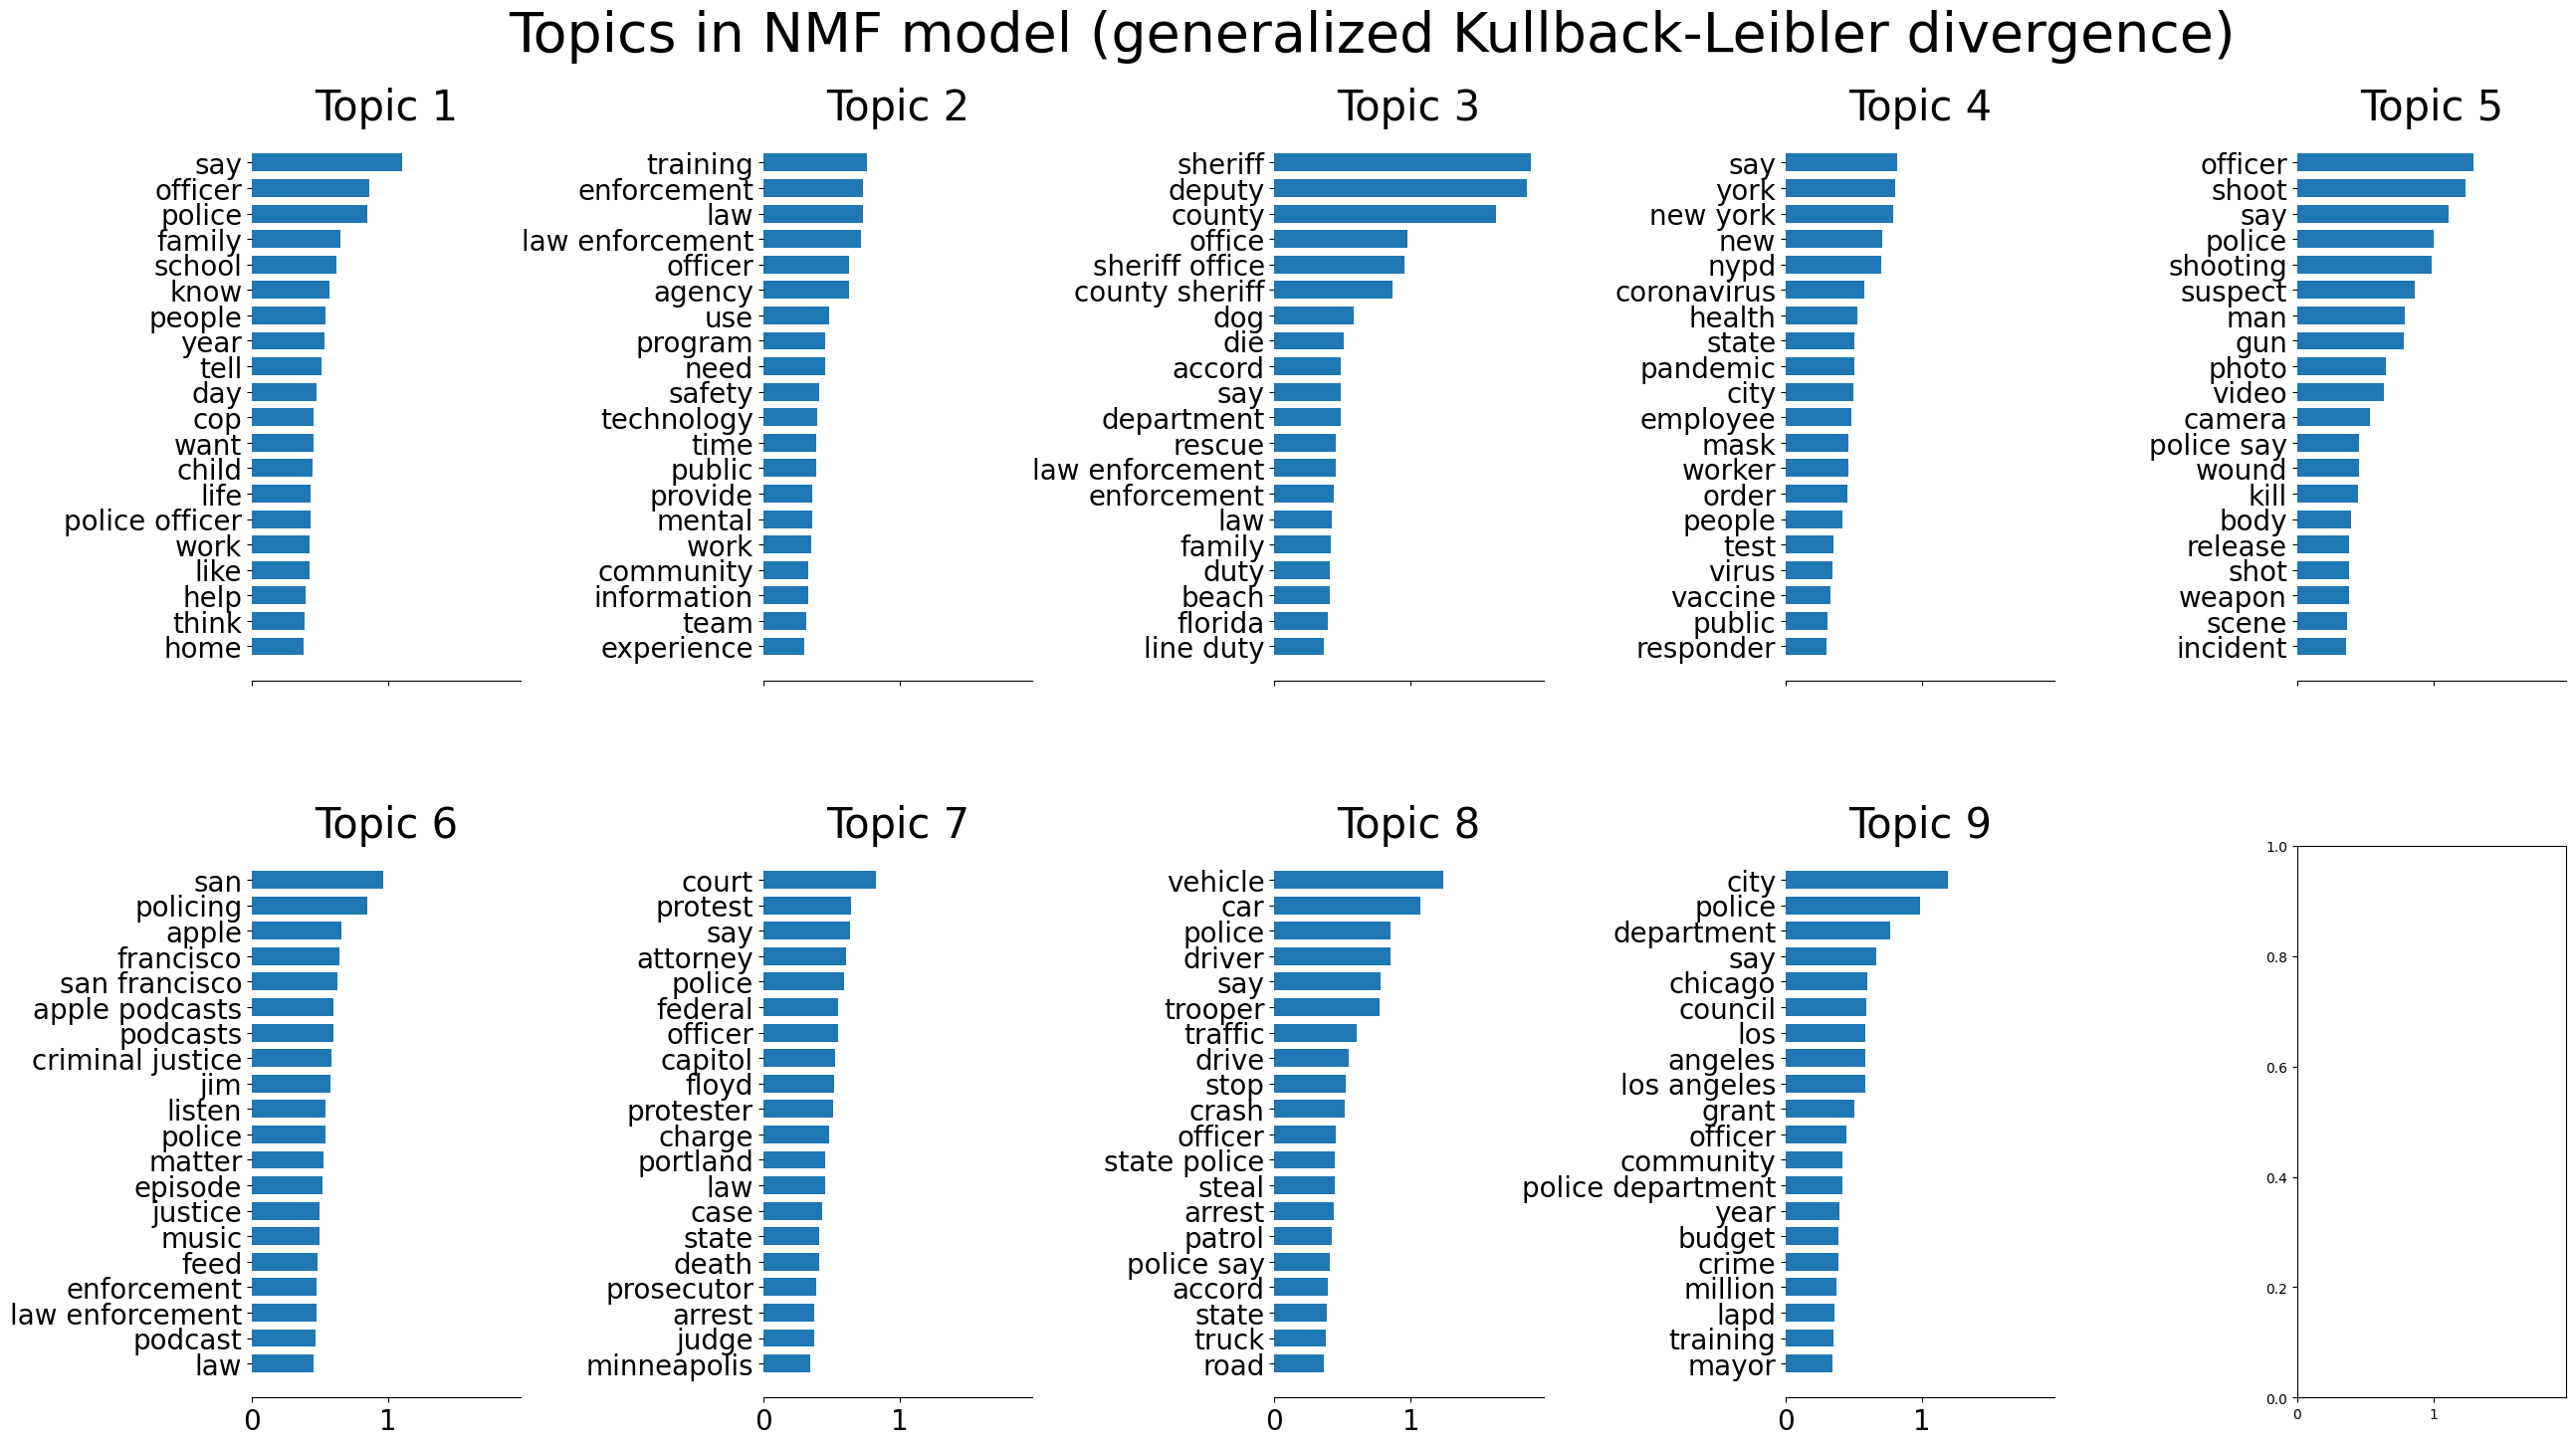

/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning:

`alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead



In [320]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
import random

random.seed(42)

n_samples=police1.shape[0]
n_features = 2000
n_components = 9 #num_topics
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, (n_components + 1)//2, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return fig

data_samples = police1['clean_text']

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english", ngram_range=(1,2)
)
tfidf = tfidf_vectorizer.fit_transform(data_samples)

print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)

nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
fig = plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)"
)

W = nmf.transform(tfidf)

In [335]:
pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

ability      able  abuse  academy    accept    access  accident  \
0         0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   
1         0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   
2         0.0  0.000000    0.0      0.0  0.040603  0.000000  0.000000   
3         0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   
4         0.0  0.026648    0.0      0.0  0.000000  0.000000  0.042884   
...       ...       ...    ...      ...       ...       ...       ...   
7817      0.0  0.000000    0.0      0.0  0.000000  0.092296  0.000000   
7818      0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   
7819      0.0  0.032502    0.0      0.0  0.000000  0.039733  0.000000   
7820      0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   
7821      0.0  0.000000    0.0      0.0  0.000000  0.000000  0.000000   

      accomplish    accord  accord police  ...  year veteran  yell  yes  \
0       0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
1       0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
2       0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
3       0.000000  0.137645            0.0  ...           0.0   0.0  0.0   
4       0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
...          ...       ...            ...  ...           ...   ...  ...   
7817    0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
7818    0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
7819    0.000000  0.000000            0.0  ...           0.0   0.0  0.0   
7820    0.029131  0.035946            0.0  ...           0.0   0.0  0.0   
7821    0.000000  0.000000            0.0  ...           0.0   0.0  0.0   

          york  york city  york daily  young     youth  zero  zone  
0     0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
1     0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
2     0.060641   0.041943    0.043274    0.0  0.000000   0.0   0.0  
3     0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
4     0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
...        ...        ...         ...    ...       ...   ...   ...  
7817  0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
7818  0.000000   0.000000    0.000000    0.0  0.042411   0.0   0.0  
7819  0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
7820  0.000000   0.000000    0.000000    0.0  0.000000   0.0   0.0  
7821  0.080692   0.000000    0.000000    0.0  0.000000   0.0   0.0  

[7822 rows x 2000 columns]

The values above are **probabilities** of each word being part of each topic. In theory, each topic contains every word from all of the documents, but, as we see above, after the first few words, the probabilities begin to fall off. So, it is very common to only show the first 15-20 words in each topic sorted by highest probabilities. 

### Further analysis and normalization

Each word has a probability as being part of a topic and that's how we can understand what each topic represents, but, as we saw above, each document will also have a probability as belonging to each topic. We can take these values and plot them against the date that article was published on so that we can determine what themes were most present at any given time in our dataset. One important note: we also divide these values by the number of articles published on each given week, so that we control for weeks that had more or less articles published than average.

In [46]:
# Process NMF topics - creating counts and sum of weights for normalization

articles_df_with_nmf_topics = police1.copy()
articles_df_with_nmf_topics.Date = articles_df_with_nmf_topics.Date.apply(pd.to_datetime)
for i in range(n_components):
    articles_df_with_nmf_topics[i] = nmf.transform(tfidf)[:,i]
    
nmf_sum_of_weights_by_week_df = articles_df_with_nmf_topics.groupby(pd.Grouper(key='Date', freq='W-MON'))[[i for i in range(n_components)]].sum()
nmf_count_of_articles_by_week_df = articles_df_with_nmf_topics.groupby(pd.Grouper(key='Date', freq='W-MON'))[[i for i in range(n_components)]].count()

nmf_count_of_articles_by_week_df = nmf_count_of_articles_by_week_df[[0]].reset_index().rename(columns={0:'num_articles'})

nmf_article_weights_and_counts = nmf_sum_of_weights_by_week_df.merge(nmf_count_of_articles_by_week_df, left_index=True, right_on='Date')
for i in range(n_components):
    nmf_article_weights_and_counts['normalized_'+ str(i)] = nmf_article_weights_and_counts[i]/ nmf_article_weights_and_counts['num_articles']

/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/mini

<AxesSubplot: xlabel='Date'>

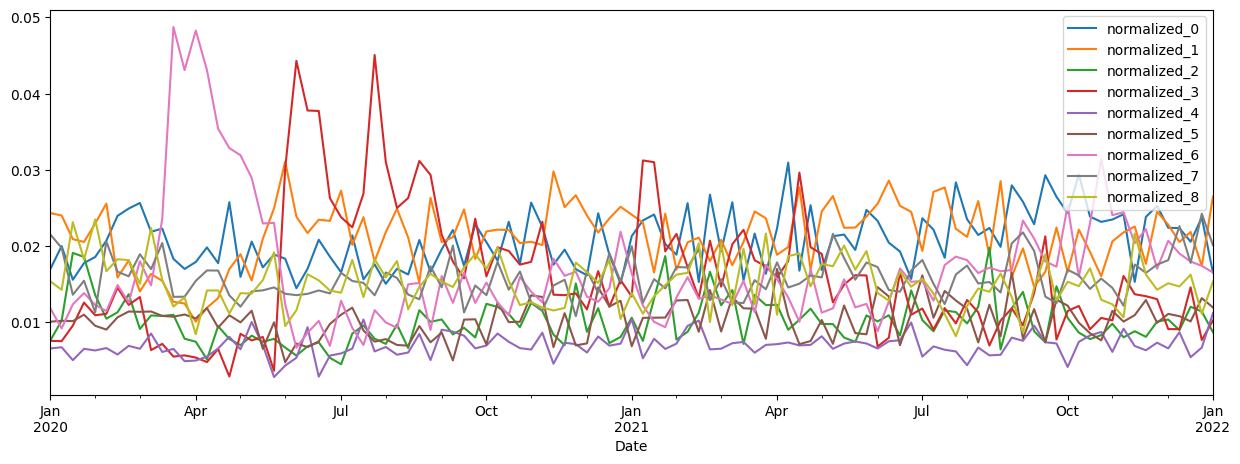

In [47]:
# topics vs. time only normalized by number of articles published on a given week
nmf_article_weights_and_counts.plot('Date',nmf_article_weights_and_counts.columns[-9:], figsize=(15,5))

In [48]:
def construct_legend_label(topic, feature_names, n_top_words_for_legend):
    """
    Creates a label for one topic with top words, for inclusion in legend
    
    Parameters:
    -----------
    topic: np.ndarray
        An array of length vocab_size that represents a topic 
        (e.g. an element of lda.components_)
    feature_names: list of str
        List of words
    n_top_words_for_legend: int
        Number of words to include
    Returns:
    --------
    label: str
    """
    top_features_ind = topic.argsort()[: -n_top_words_for_legend - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    label = ''
    for word in top_features:
        label += word
        label += ', '
    label += "..."
    return label

The plot above can be difficult to interpret because there is a lot of variation over time. This is because the time segments we chose to look at (a week) is relatively small. We can make the visualization a bit easier to interpret by filtering the the probabilities through a 'Gaussian filter.' This normalizes our data to fit a Gaussian normal distribution (aka 'bell shaped curve'). [N.B.: Thanks to Karin for this idea!]

/var/folders/l_/b5wczsf55z9dmf_dzr3vw6ph0000gr/T/ipykernel_59774/3432471293.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


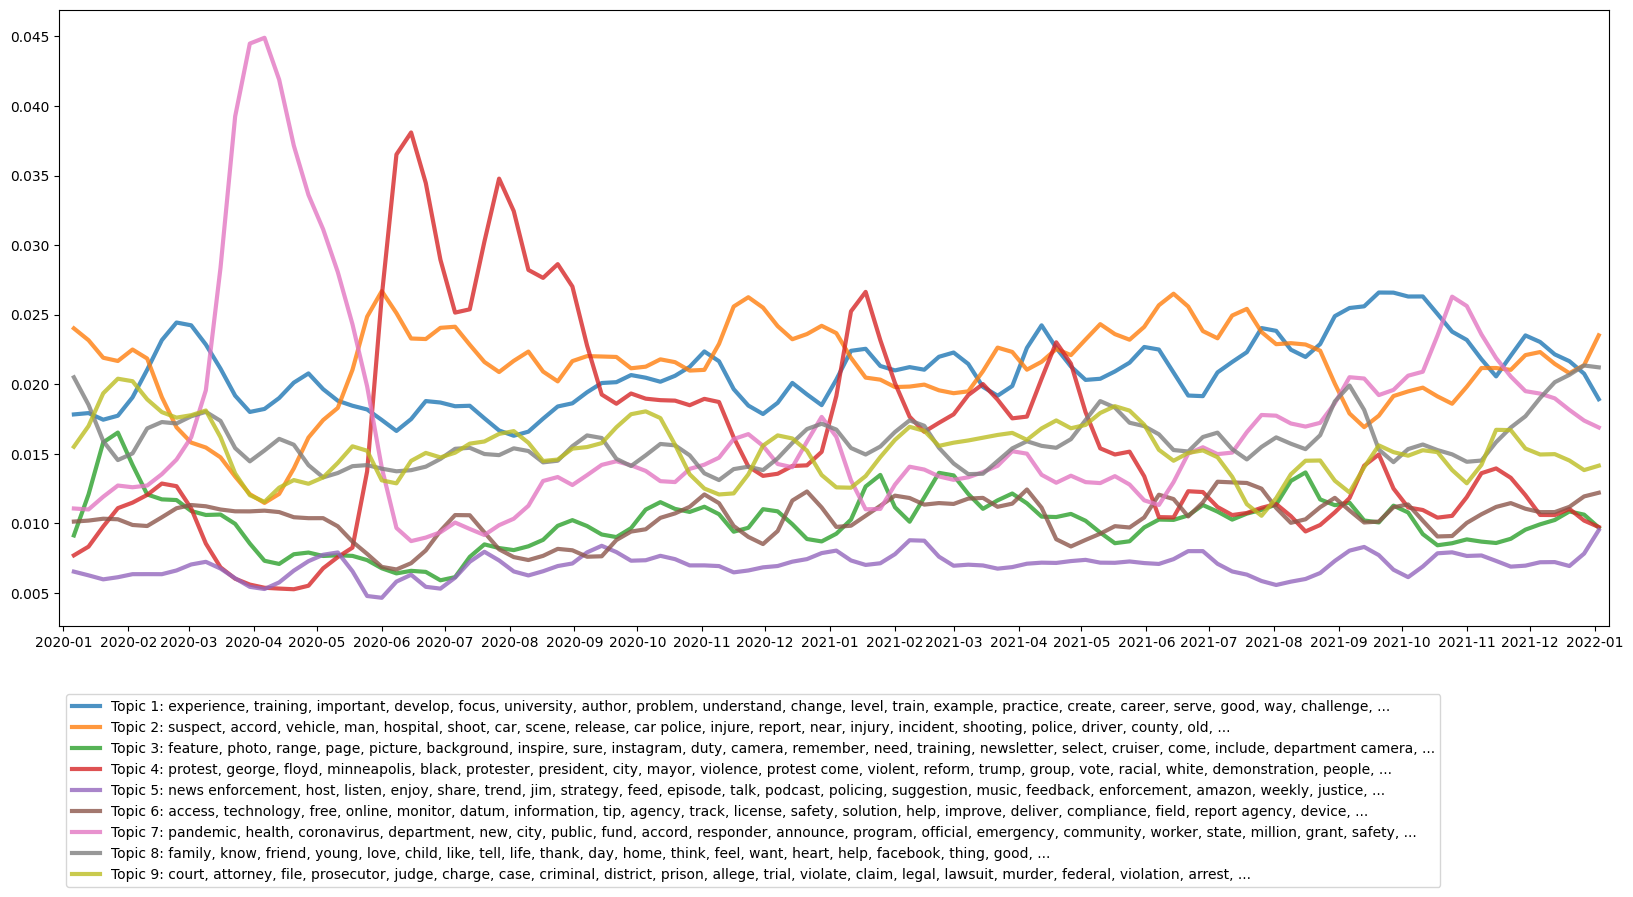

In [49]:
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.dates as mdates

n_top_words_for_legend = 20
feature_names = tfidf_vectorizer.get_feature_names_out()
fig, ax = plt.subplots(figsize=(20, 8))
linewidth=3
alpha=0.8

for topic_num, topic in enumerate(nmf.components_):
    smoothed_topics = gaussian_filter1d(nmf_article_weights_and_counts['normalized_'+str(topic_num)], sigma=1)
    label = "Topic " + str(topic_num+1) + ": "
    label += construct_legend_label(topic, feature_names, n_top_words_for_legend)
    ax.plot(nmf_article_weights_and_counts['Date'],smoothed_topics,label=label, linewidth=linewidth, alpha=alpha)

ax.legend(bbox_to_anchor=(0,-.1), loc="upper left")
ax.set_xlim((18260, 19000))
ax.xaxis.set_major_locator(mdates.MonthLocator())

In [50]:
import numpy as np
police1_topics = articles_df_with_nmf_topics.copy()
police1_topics['topic'] = police1_topics.apply(lambda x: np.argmax(x[-9:]), axis=1)

In [51]:
# police1_topics = police1_topics.drop(police1_topics.columns[-10:-1], axis=1) # drop weights, can come back
# by finding the index of the highest probabiliy we can assign topics to each document
police1_topics

Unnamed: 0.1                                              Title  \
0                0  Missouri police: Cop fatally shot man who hit ...   
1                1  Illinois governor clears thousands of marijuan...   
2                2  NYC ends 2019 with a jump in shootings and hom...   
3                3  K-9 dies after collision that injured Kentucky...   
4                4                   3 times I was glad I had a knife   
...            ...                                                ...   
7817          7851  Judge sides with law enforcement in pipeline p...   
7818          7852  LAPD officer who fatally shot 14-year-old desc...   
7819          7853  Colorado wildfires burn hundreds of homes, for...   
7820          7854  California criminal justice panel eyes 'three ...   
7821          7855  More than 20% of NYPD out sick due to COVID-19...   

                                               Subtitle  \
0     The man drove a stolen vehicle into the office...   
1     State officials estimate that 116,000 convicti...   
2     The increase in homicides come amid fears a se...   
3     Capt. Casey McCoy was making a left turn onto ...   
4     A veteran officer recounts several encounters ...   
...                                                 ...   
7817  Demonstrators had alleged that police used exc...   
7818  “He’s truly devastated at the results of the o...   
7819  “This is the kind of fire we can’t fight head ...   
7820  They want an "across-the-board reduction in in...   
7821  The NYPD received 7,270 sick calls — the most ...   

                                                   Link                Date  \
0     https://www.police1.com/officer-shootings/arti... 2019-12-31 18:08:37   
1     https://www.police1.com/legal/articles/illinoi... 2019-12-31 18:23:02   
2     https://www.police1.com/patrol-issues/articles... 2019-12-31 18:31:12   
3     https://www.police1.com/k-9/articles/k-9-dies-... 2019-12-31 23:09:27   
4     https://www.police1.com/police-products/duty-g... 2020-01-01 10:00:00   
...                                                 ...                 ...   
7817  https://www.police1.com/officer-safety/article... 2021-12-30 17:44:54   
7818  https://www.police1.com/officer-shootings/arti... 2021-12-30 22:41:03   
7819  https://www.police1.com/disaster-response/arti... 2021-12-30 22:58:07   
7820  https://www.police1.com/arrests-sentencing/art... 2021-12-31 11:41:57   
7821  https://www.police1.com/coronavirus-covid-19/a... 2021-12-31 12:00:00   

                  Category                                               text  \
0        officer-shootings  CHESTERFIELD, Mo. — Police in suburban St. Lou...   
1                    legal  CHICAGO — Illinois' governor granted more than...   
2            patrol-issues  NEW YORK CITY — As the city bids farewell to 2...   
3                      k-9  LEXINGTON, Ky. — The Boyle County Sheriff's De...   
4          police-products  Sponsored by ZT Knives By Sean Curtis for Poli...   
...                    ...                                                ...   
7817        officer-safety  BISMARCK, N.D. — A federal judge has sided wit...   
7818     officer-shootings  LOS ANGELES — Los Angeles police Officer Willi...   
7819     disaster-response  DENVER — An estimated 580 homes, a hotel and a...   
7820    arrests-sentencing  LOS ANGELES — For more than a year, a seven-pe...   
7821  coronavirus-covid-19  STATEN ISLAND, N.Y. — More than 20% of the New...   

                                                 author  \
0                                      Associated Press   
1                 By Kathleen Foody\r\nAssociated Press   
2     By Wes Parnell and Thomas Tracy\r\nNew York Da...   
3              By Karla Ward\r\nLexington Herald-Leader   
4                                           Sean Curtis   
...                                                 ...   
7817                                   Associated Press   
7818         By Tony Saave

In [52]:
# topic 7 = covid; topic 8 = george floyd, Python indexiing starts at 0!!

covid = police1_topics.loc[police1_topics['topic'] == 6].reset_index(drop=True)
floyd = police1_topics.loc[police1_topics['topic'] == 3].reset_index(drop=True)

In [53]:
from datetime import date

today = date.today()
covid.to_csv(f'police1_covid_articles_{str(today)}.csv')
floyd.to_csv(f'police1_floyd_articles_{str(today)}.csv')

In [54]:
# all of the same code as above
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, (n_components + 1)//2, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return fig

def construct_legend_label(topic, feature_names, n_top_words_for_legend):
    top_features_ind = topic.argsort()[: -n_top_words_for_legend - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    label = ''
    for word in top_features:
        label += word
        label += ', '
    label += "..."
    return label

def generate_word_vis(df, n_features=2000, n_components=9, n_top_words=20, max_df=0.95, min_df=2, date_col='Date', clean_col='clean_text'):
    n_samples = df.shape[0]
    data_samples = df[clean_col]

    # Use tf-idf features for NMF.
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(
        max_df=max_df, min_df=min_df, max_features=n_features, stop_words="english", ngram_range=(1,2)
    )
    tfidf = tfidf_vectorizer.fit_transform(data_samples)

    print(
        "\n" * 2,
        "Fitting the NMF model (generalized Kullback-Leibler "
        "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
        % (n_samples, n_features),
    )

    nmf = NMF(
        n_components=n_components,
        random_state=1,
        beta_loss="kullback-leibler",
        solver="mu",
        max_iter=1000,
        alpha=0.1,
        l1_ratio=0.5
    ).fit(tfidf)

    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    fig = plot_top_words(
        nmf,
        tfidf_feature_names,
        n_top_words,
        "Topics in NMF model (generalized Kullback-Leibler divergence)"
    )
    return nmf, tfidf, tfidf_vectorizer

def generate_weights_by_freq(df, nmf, tfidf, date_col='Date', freq='W-MON'):
    articles_df_with_nmf_topics = df.copy()
    articles_df_with_nmf_topics[date_col] = articles_df_with_nmf_topics[date_col].apply(pd.to_datetime)
    for i in range(n_components):
        articles_df_with_nmf_topics[i] = nmf.transform(tfidf)[:,i]
    articles_df_with_nmf_topics['topic'] = articles_df_with_nmf_topics.apply(lambda x: np.argmax(x[-9:]), axis=1)
        
    nmf_sum_of_weights_by_week_df = articles_df_with_nmf_topics.groupby(pd.Grouper(key=date_col, freq=freq))[[i for i in range(n_components)]].sum()
    nmf_count_of_articles_by_week_df = articles_df_with_nmf_topics.groupby(pd.Grouper(key=date_col, freq=freq))[[i for i in range(n_components)]].count()

    nmf_count_of_articles_by_week_df = nmf_count_of_articles_by_week_df[[0]].reset_index().rename(columns={0:'num_articles'})
    nmf_article_weights_and_counts = nmf_sum_of_weights_by_week_df.merge(nmf_count_of_articles_by_week_df, left_index=True, right_on='Date')
    for i in range(n_components):
        nmf_article_weights_and_counts['normalized_'+ str(i)] = nmf_article_weights_and_counts[i]/ nmf_article_weights_and_counts['num_articles']
    return articles_df_with_nmf_topics, nmf_article_weights_and_counts

def plot_nongaussian(df, date_col='Date'):
    df.plot(date_col,df.columns[-9:], figsize=(15,5))

def plot_gaussian(tfidf_vectorizer, nmf, df, date_col='Date', n_top_words_for_legend=20):
    feature_names = tfidf_vectorizer.get_feature_names_out()
    fig, ax = plt.subplots(figsize=(20, 8))
    linewidth=3
    alpha=0.8

    for topic_num, topic in enumerate(nmf.components_):
        smoothed_topics = gaussian_filter1d(nmf_article_weights_and_counts['normalized_'+str(topic_num)], sigma=1)
        label = "Topic " + str(topic_num+1) + ": "
        label += construct_legend_label(topic, feature_names, n_top_words_for_legend)
        ax.plot(df[date_col],smoothed_topics,label=label, linewidth=linewidth, alpha=alpha)

    ax.legend(bbox_to_anchor=(0,-.1), loc="upper left")
    # ax.set_xlim((18260, 19000))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

Extracting tf-idf features for NMF...


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=1133 and n_features=2000...


/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


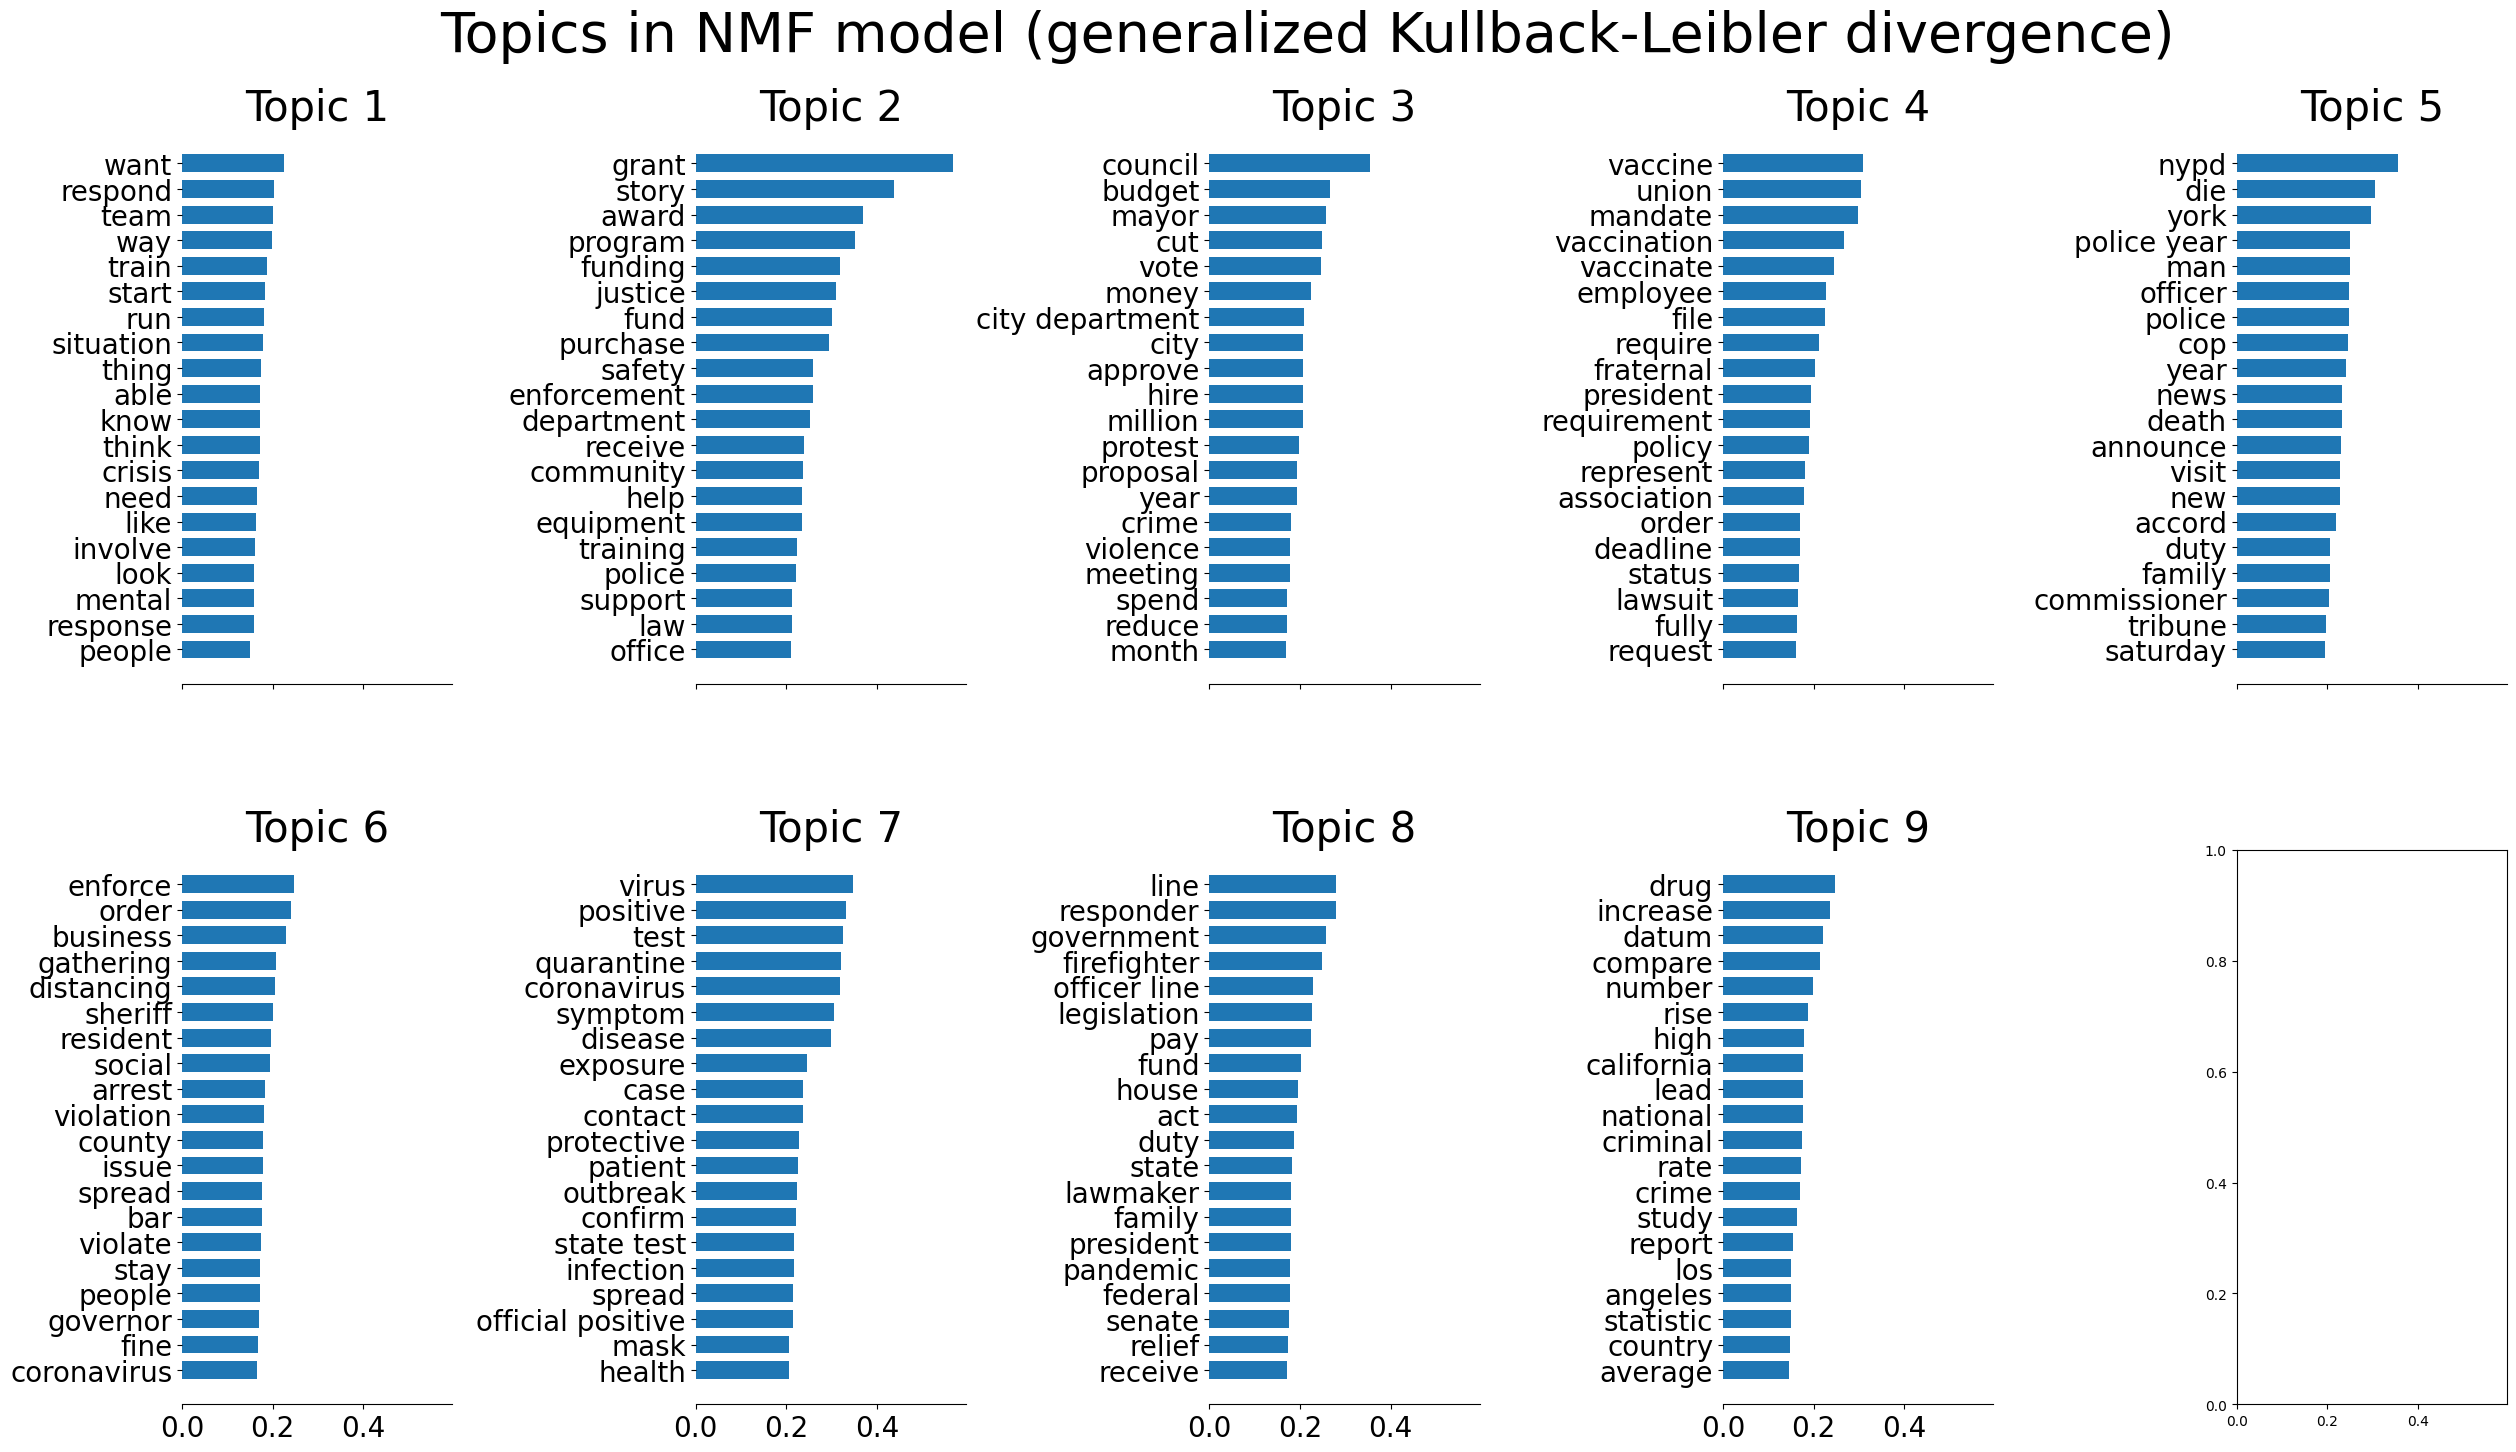

/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/mini

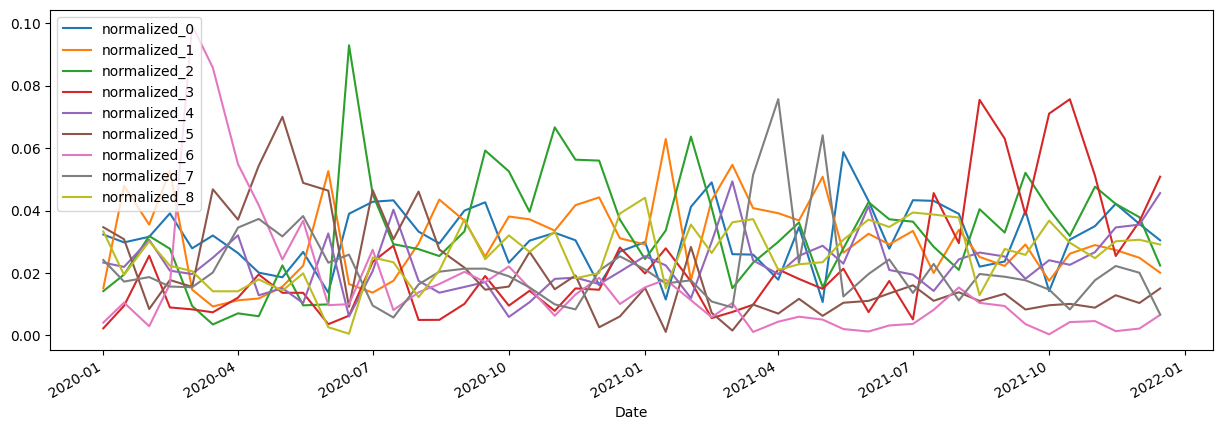

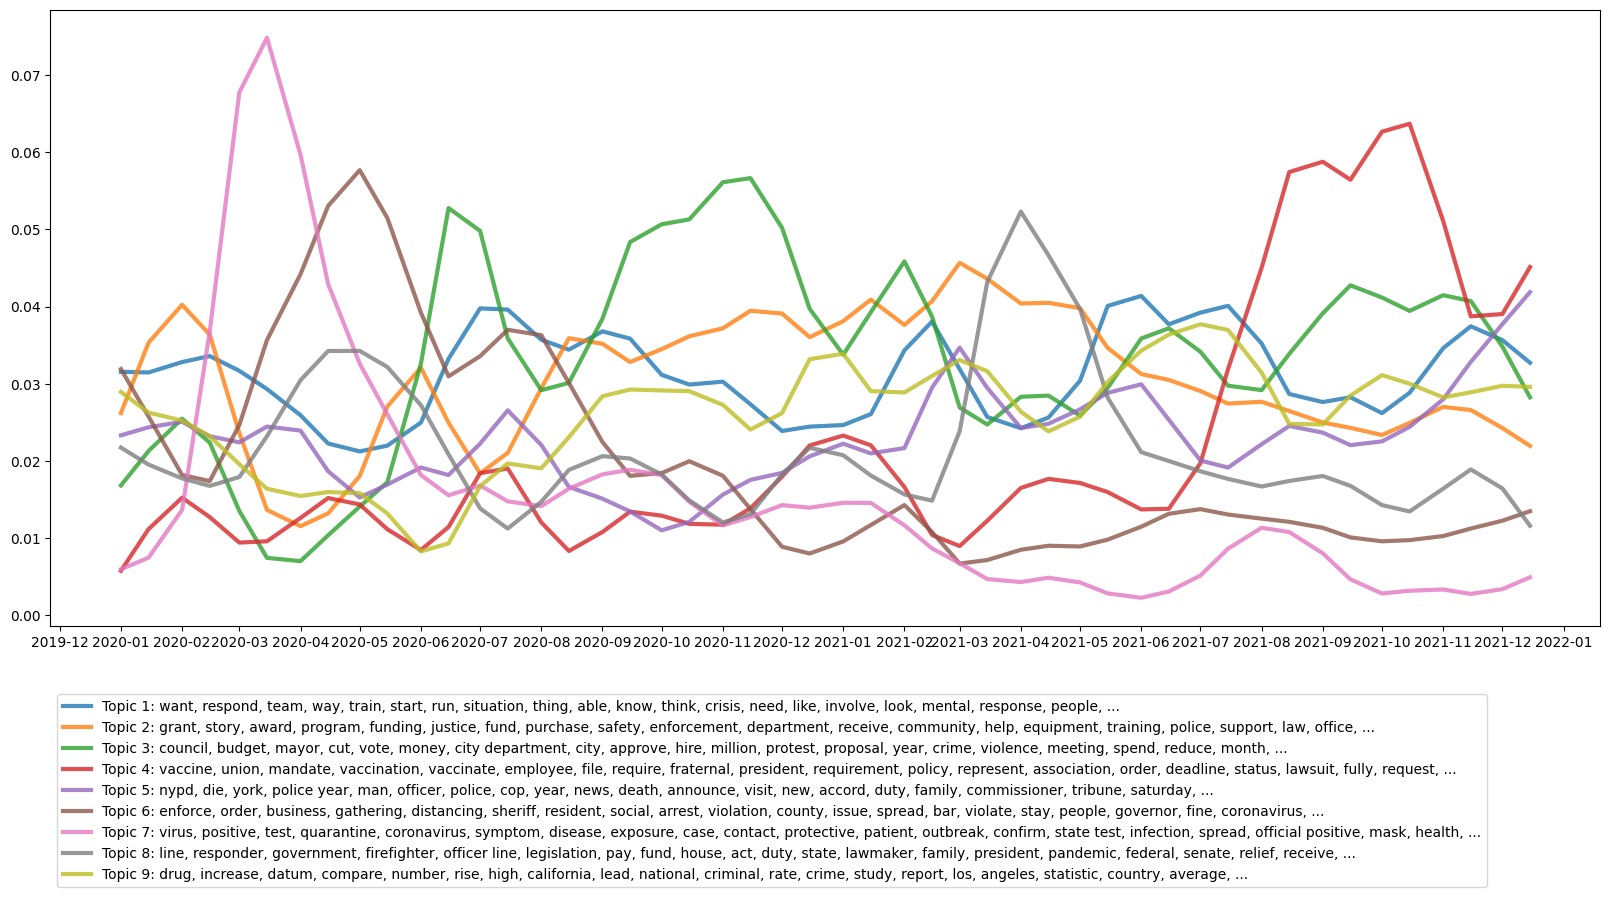

In [55]:
nmf_covid, tfidf, tfidf_vectorizer = generate_word_vis(covid, n_components=9)
articles_df_with_nmf_topics, nmf_article_weights_and_counts = generate_weights_by_freq(covid, nmf_covid, tfidf, freq='SMS')
plot_nongaussian(nmf_article_weights_and_counts)
plot_gaussian(tfidf_vectorizer, nmf_covid, nmf_article_weights_and_counts)

Extracting tf-idf features for NMF...


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=1031 and n_features=2000...


/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


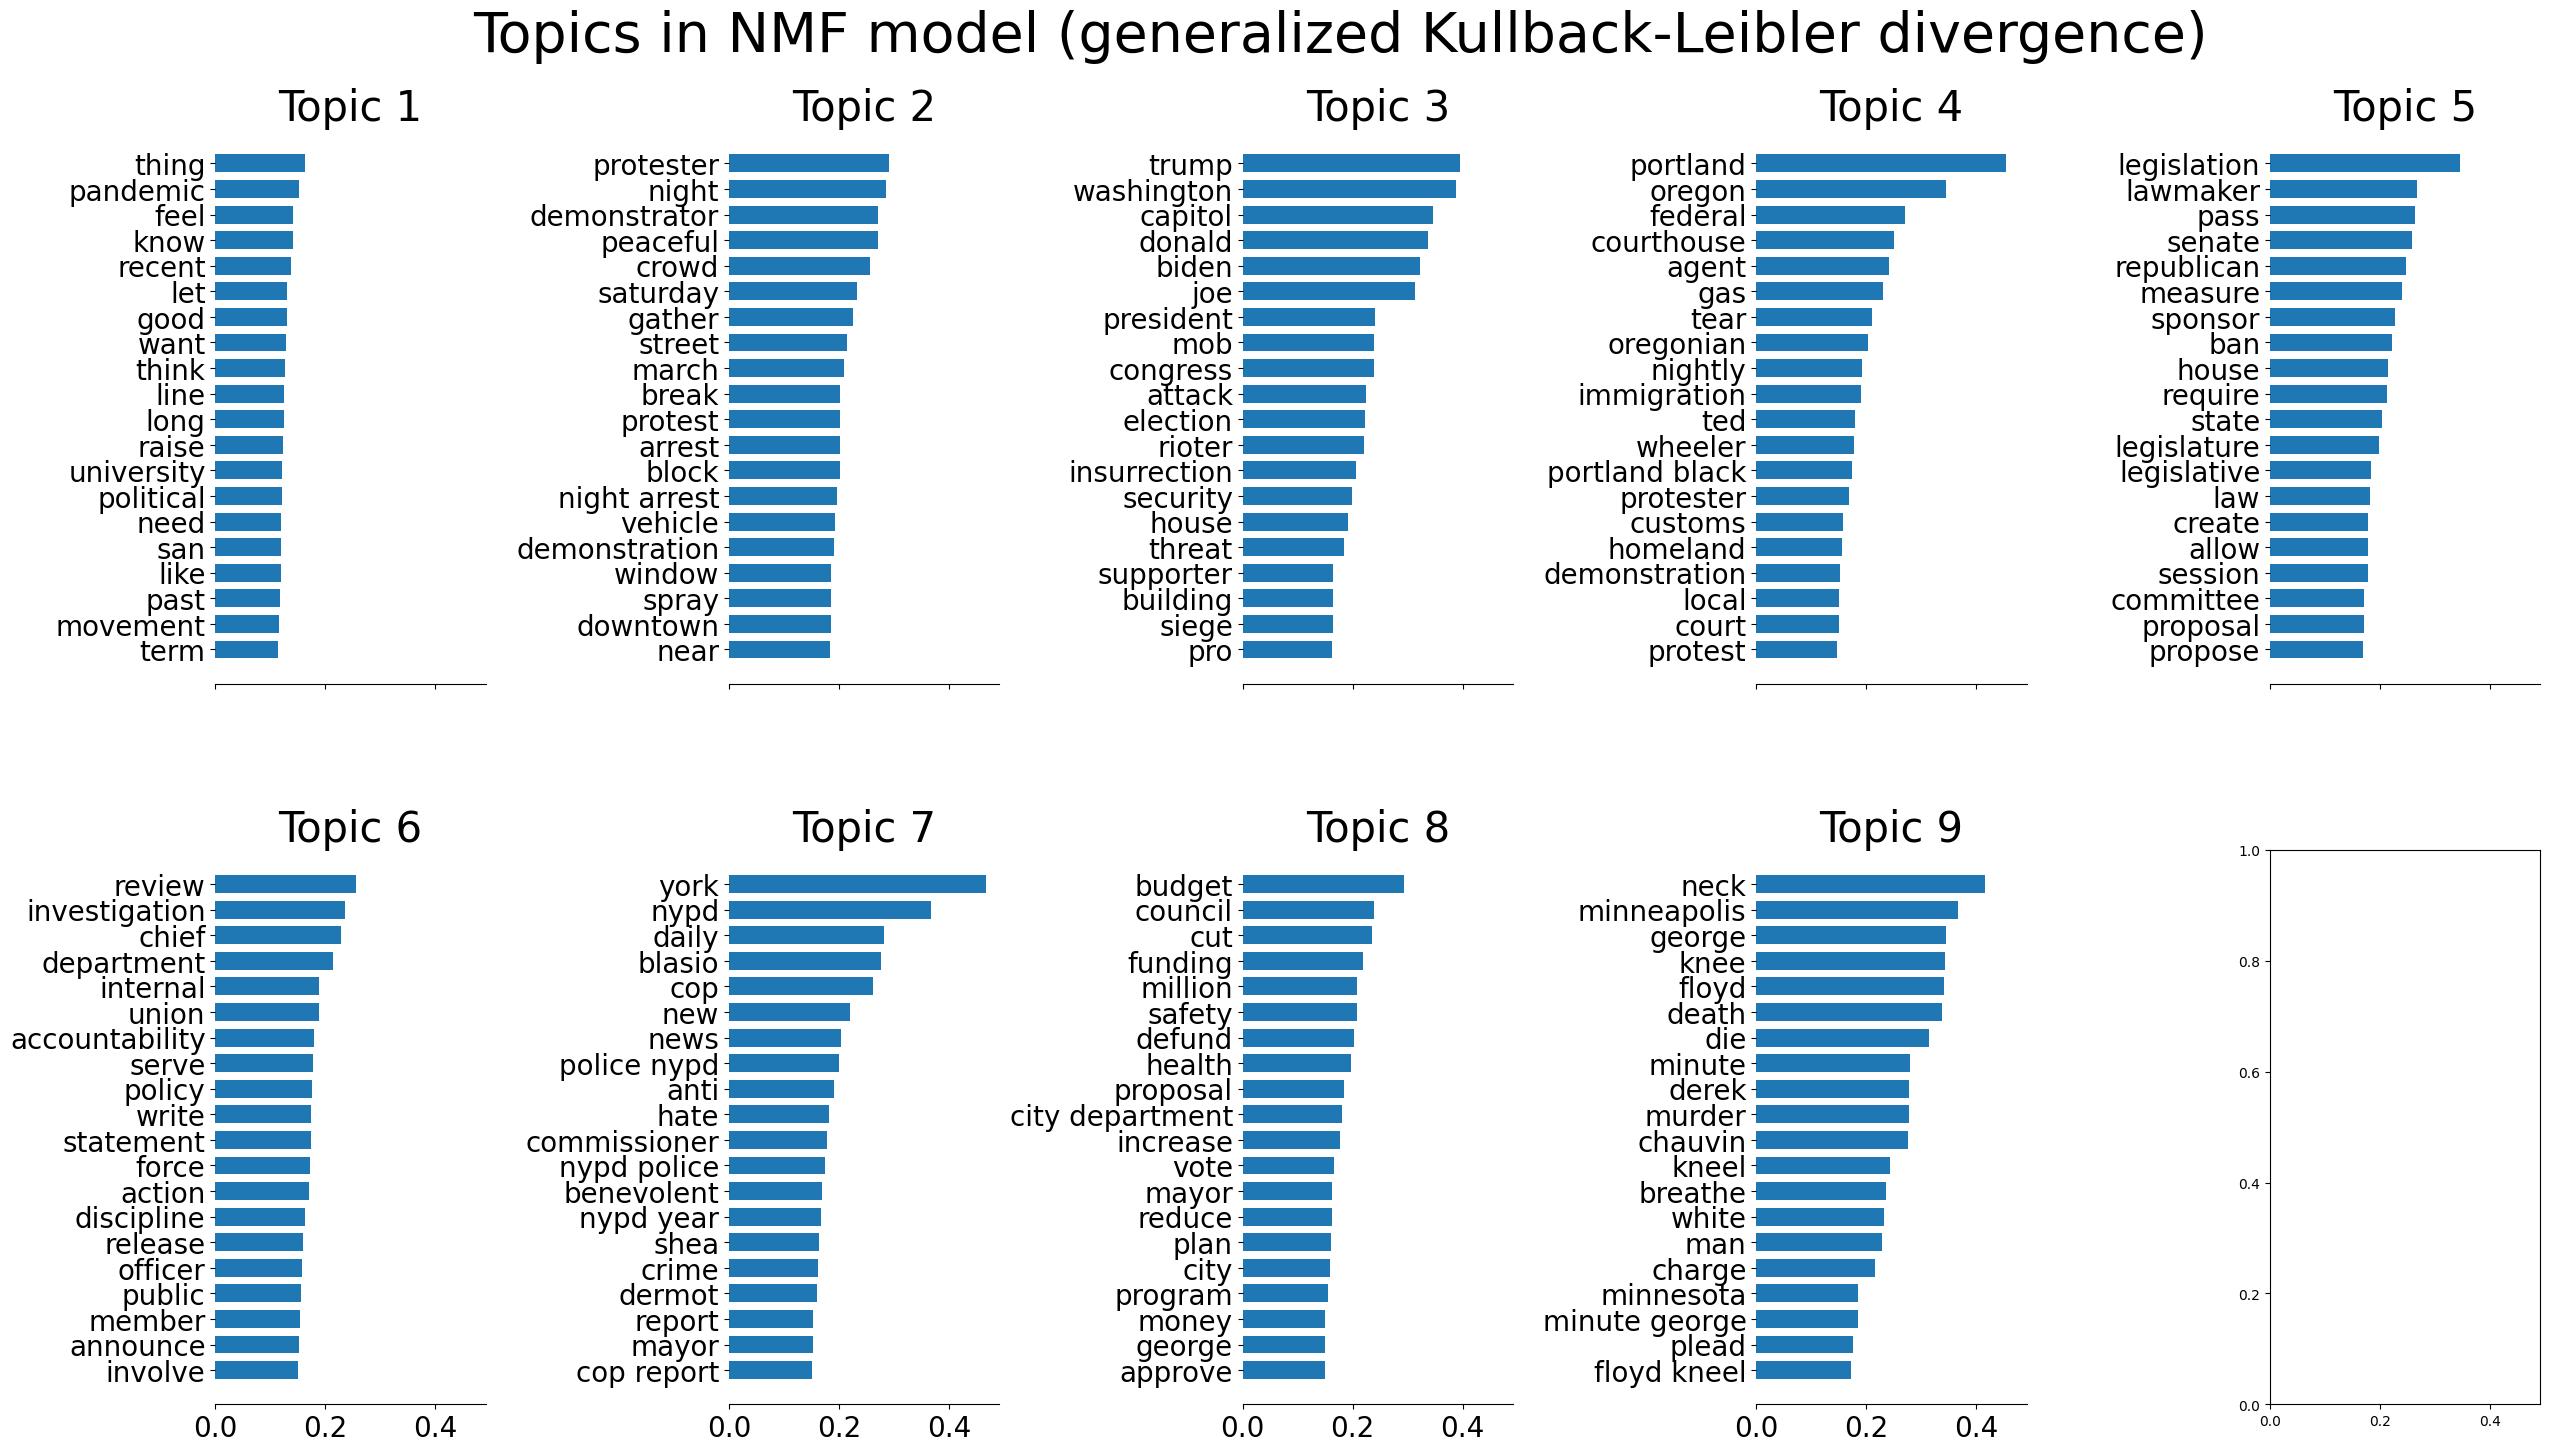

/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/miniconda3/envs/webscrape_env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/Users/pnadel01/mini

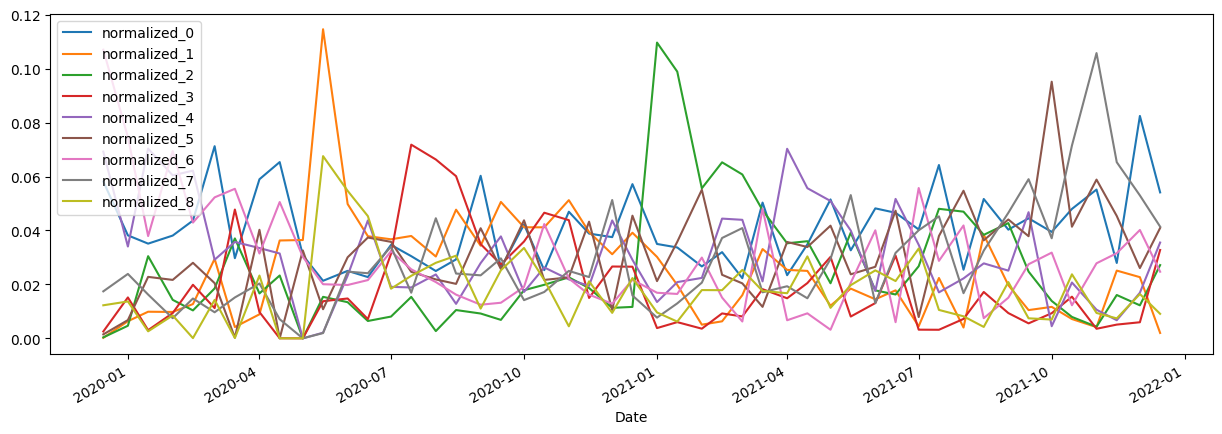

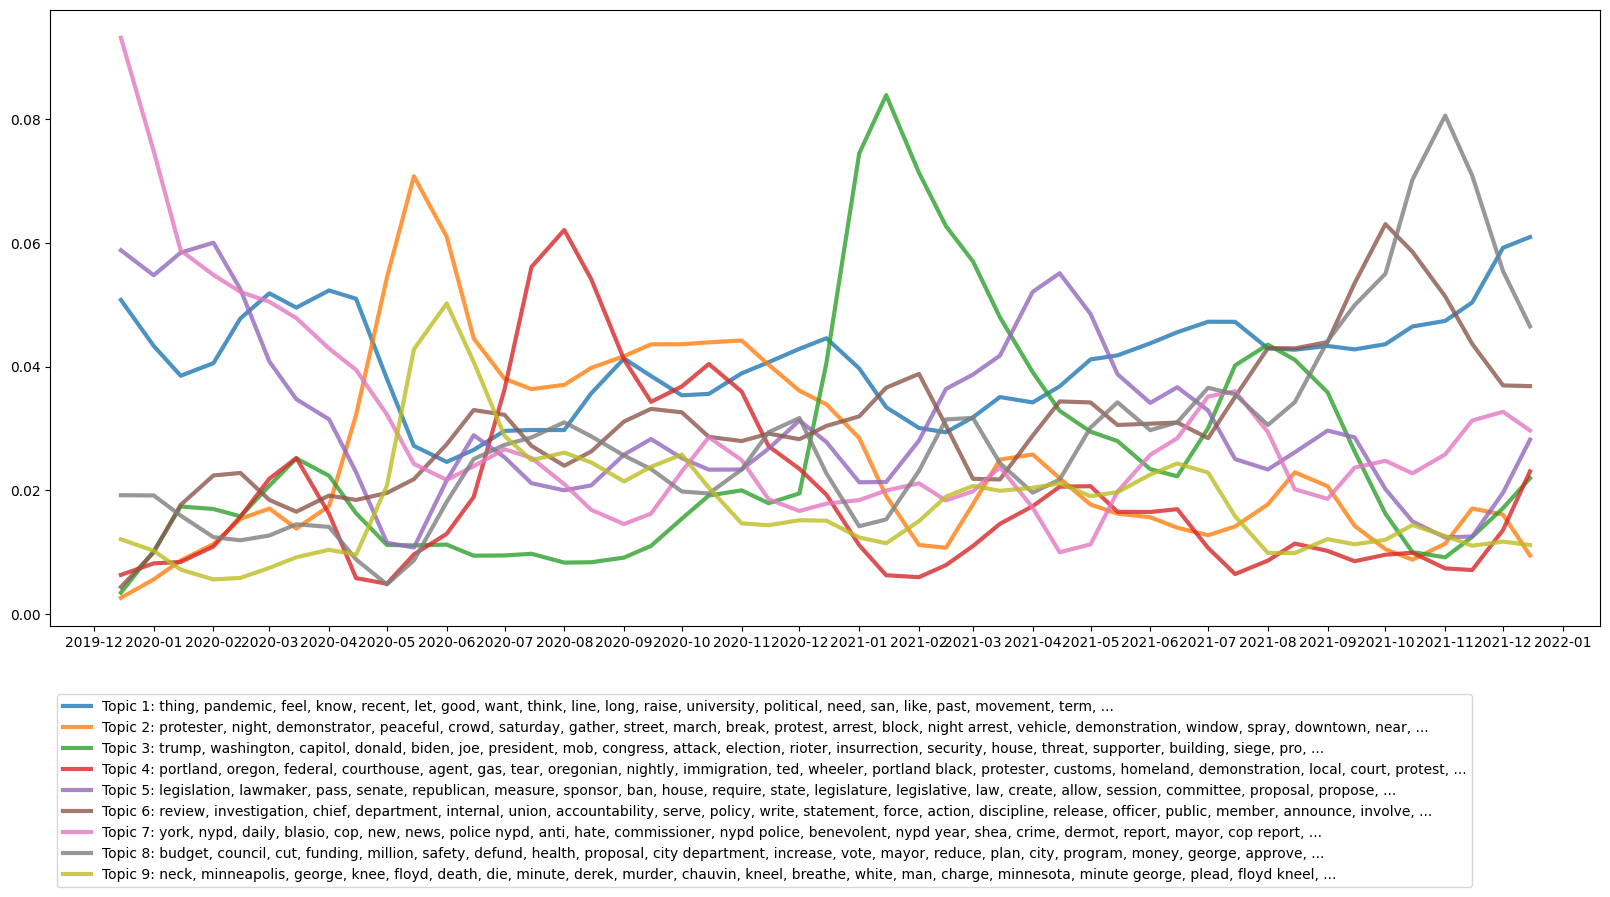

In [56]:
nmf_floyd, tfidf, tfidf_vectorizer = generate_word_vis(floyd, n_components=9)
articles_df_with_nmf_topics, nmf_article_weights_and_counts = generate_weights_by_freq(floyd, nmf_floyd, tfidf, freq='SMS') # SMS for zero values 
plot_nongaussian(nmf_article_weights_and_counts)
plot_gaussian(tfidf_vectorizer, nmf_floyd, nmf_article_weights_and_counts)